In [1]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skimage.transform import resize

# Data observation

Python dictionaries and Pandas DataFrames each have their own strengths and weaknesses, and the choice between the two often depends on the specific use case.

For instance, if you’re looking to retrieve values, Python dictionaries can be faster. In a toy example, the DataFrame.iloc method was found to be more than 100 times slower than a dictionary1.

However, for certain operations, a Pandas DataFrame can be more efficient. For example, when accessing rows of data, a DataFrame can be faster. In a test, a dict of lists was found to be 5 times slower at retrieving rows than df.iloc1.

In another benchmarking experiment, a DataFrame was slightly faster than a list of dictionaries for a simple summation operation. For a more complex operation like the Haversine function, the DataFrame was significantly faster2.

So, if you’re dealing with small, targeted tasks, a dictionary might be faster. But for larger datasets and more complex operations, a DataFrame can offer better performance. It’s also worth noting that despite its added complexity, a Pandas DataFrame has a significantly smaller memory footprint than a list of dictionaries3.

In conclusion, the choice between Python dictionaries and Pandas DataFrames largely depends on the specific requirements of your task, including the size of your data and the operations you need to perform. It’s always a good idea to benchmark different approaches to find the most efficient solution for your specific use case.

## Images

(2496, 2048)
(224, 224)


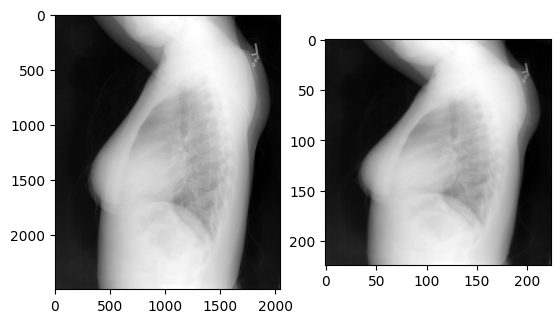

Shape of images to CNN: (1, 224, 224)


In [2]:
img = cv2.imread('./data/images/images_normalized/1_IM-0001-3001.dcm.png', cv2.IMREAD_GRAYSCALE)
print(img.shape)
imgr = resize(img, (224, 224))
print(imgr.shape)
plt.subplot(1,2,1).imshow(img, cmap='gray')
plt.subplot(1,2,2).imshow(imgr, cmap='gray')
plt.show()

# For CNN we need to add a channel dimension
imgr = np.expand_dims(imgr, axis=0)
print(f"Shape of images to CNN: {imgr.shape}")

## Reports

[nltk_data] Downloading package punkt to /home/mdelucasg/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


We have 3851 reports and 2554 are unique.
There are 514 No findings reports
Longest report has 1054 characters. 
Report: Chest  Comparison: There is a 2.6 cm diameter masslike density over the lingula partial obscuration left cardiac XXXX. There may be some ill-defined opacity in the right mid and lower lung zone. No pleural effusion is seen. The heart is borderline enlarged. The aorta is dilated and tortuous. Arthritic changes of the spine are present.  Pelvis and left hip There is an impacted and rotated fracture through the neck of the femur on the left. No pelvic fracture is seen. Arthritic changes are present in the lower lumbar spine. Large amount of stool and XXXX obscures portions of the pelvis.  Femur The femoral images do not XXXX the area of the hip fracture. The remaining portions of the femur appear to be intact with no fracture or destructive process. Extensive atherosclerotic vascular disease throughout the superficial femoral artery is present.  Left knee There is osteo

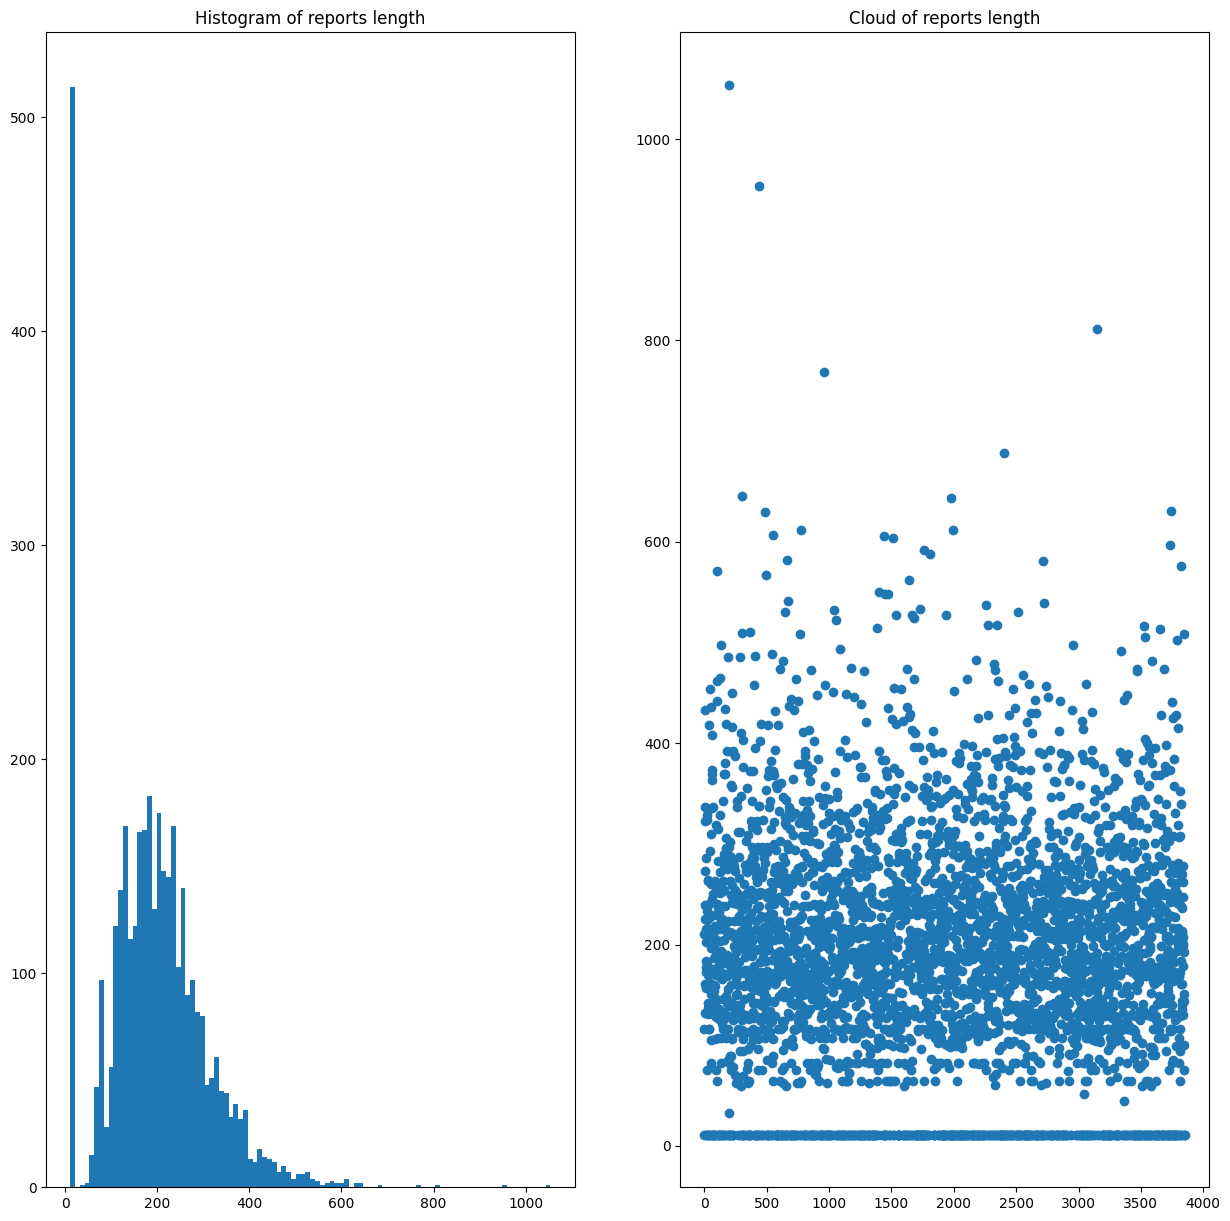

In [3]:
import data.preprocessing as pr


only_reports = []
for uid in pr.reports.index:
    report = pr.reports.loc[uid]['findings']
    report = report if type(report) == str else 'No findings'
    only_reports.append(report)

print(f"We have {len(only_reports)} reports and {len(set(only_reports))} are unique.")

counter = 0
longest_report = ''

for report in only_reports:
    counter += 1 if report == 'No findings' else 0
    if len(report) > len(longest_report):
        longest_report = report

print(f"There are {counter} No findings reports")
print(f"Longest report has {len(longest_report)} characters. \nReport: {longest_report}")

# Plot histogram and cloud of reports length
l = [len(report) for report in only_reports]

plt.figure(figsize=(15,15))
plt.subplot(1,2,1).hist(l, bins=100)
plt.title('Histogram of reports length')
plt.subplot(1,2,2).scatter(range(len(l)), l)
plt.title('Cloud of reports length')
plt.show()

When treating whin NaN reports, we saw that the distribution is affected as there are 514 reports saying 'No findings'.

We also observe how the distribution has left skew.

In [4]:
uids = pr.reports.index
data = pr.projections.copy()

for uid in uids:
    report = pr.reports.loc[uid]['findings']
    data.loc[uid, 'report'] = report if type(report) == str else 'No findings.'

data.head()

,filename,projection,report
uid,,,
1,1_IM-0001-4001.dcm.png,Frontal,The cardiac silhouette and mediastinum size ar...
1,1_IM-0001-3001.dcm.png,Lateral,The cardiac silhouette and mediastinum size ar...
2,2_IM-0652-1001.dcm.png,Frontal,Borderline cardiomegaly. Midline sternotomy XX...
2,2_IM-0652-2001.dcm.png,Lateral,Borderline cardiomegaly. Midline sternotomy XX...
3,3_IM-1384-1001.dcm.png,Frontal,No findings.


### Image to tensor

In [5]:
from torchvision import transforms

filename = data.iloc[0]['filename']
report = data.iloc[0]['report']
img = pr.load_image('data/images/images_normalized/' + filename).astype(np.float32)
print(f"Image shape: {img.shape}")

# Image to tensor
img_tensor = transforms.ToTensor()(img)
print(f"Image tensor shape: {img_tensor.shape}")
img_tensor = img_tensor.permute(1, 2, 0)
print(f"Image tensor shape: {img_tensor.shape}")
img_tensor = img_tensor.unsqueeze(0)
print(f"Image tensor shape: {img_tensor.shape}")

Image shape: (1, 2048, 2048)
Image tensor shape: torch.Size([2048, 1, 2048])
Image tensor shape: torch.Size([1, 2048, 2048])
Image tensor shape: torch.Size([1, 1, 2048, 2048])
